## 3-ая неделя Random Forest
<a href='https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15'>EDA</a>

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [103]:
titanic_train_data = pd.read_csv('https://raw.githubusercontent.com/betelgeus/study/master/data/titanic/train.csv')
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
X = titanic_train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_train_data['Survived']

In [105]:
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})

In [106]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [114]:
rs = np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = rs)

In [75]:
params = {'n_estimators': range(5, 25, 5), 'max_depth': range(1, 10), 'min_samples_split': range(5, 30, 5), 'min_samples_leaf': range(5, 30, 5)}

In [76]:
clf_rf = RandomForestClassifier()

In [77]:
best_clf_rs = GridSearchCV(clf_rf, params)

In [78]:
best_clf_rs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(5, 30, 5),
                         'min_samples_split': range(5, 30, 5),
                         'n_estimators': range(5, 25, 5)})

In [79]:
best_clf_rs.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 5}

In [80]:
predictions = best_clf_rs.predict(X_test)

/Users/mitya/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


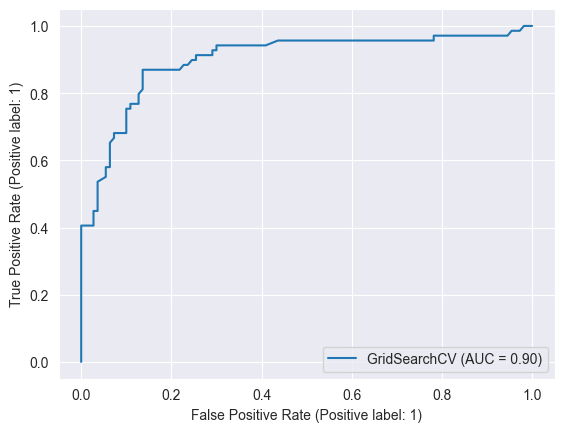

In [81]:
plot_roc_curve(best_clf_rs, X_test, y_test)
plt.show()

/Users/mitya/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


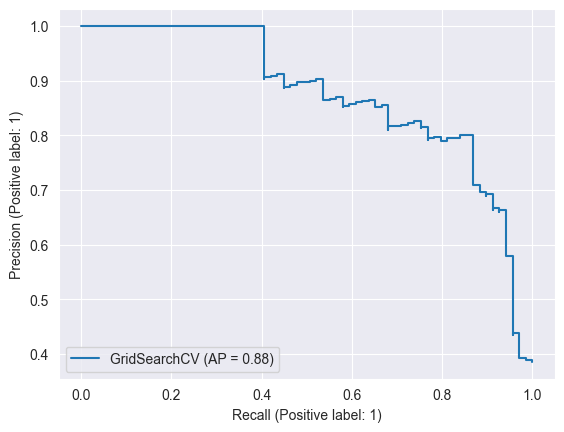

In [82]:
plot_precision_recall_curve(best_clf_rs, X_test, y_test)
plt.show()

In [83]:
test_prob = best_clf_rs.predict_proba(X_test)[:, 1]
test_pred = best_clf_rs.predict(X_test)

In [84]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.39150
AUC = 0.90007
Average Precision = 0.87571

Using 0.5 as threshold:
Accuracy = 0.83240
Precision = 0.85455
Recall = 0.68116
F1 score = 0.75806

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.68      0.76        69

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



Confusion Matrix


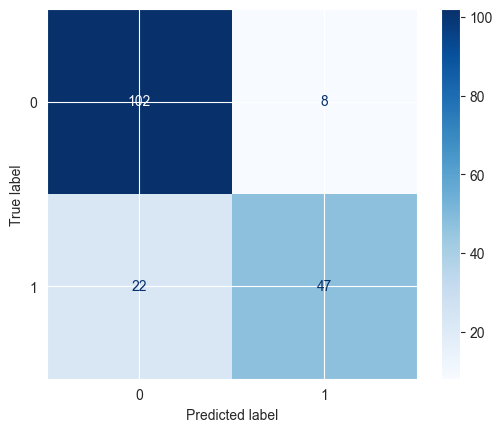

In [85]:
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

### Задача
Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

In [87]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

=====================

In [115]:
clf = DecisionTreeClassifier()

In [124]:
params = {'max_depth': range(1, 10), 'min_samples_split': range(5, 30, 5), 'min_samples_leaf': range(5, 30, 5)}

In [125]:
grid_search_cv_clf=GridSearchCV(clf, params, cv=5)

In [126]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(5, 30, 5),
                         'min_samples_split': range(5, 30, 5)})

In [127]:
best_clf = grid_search_cv_clf.best_estimator_

In [128]:
best_clf.feature_importances_

array([0.17271515, 0.06032249, 0.07349258, 0.        , 0.05817563,
       0.63529417, 0.        , 0.        , 0.        , 0.        ])

In [129]:
feature_importance_df = pd.DataFrame({'features': list(X_train), 'importance': best_clf.feature_importances_})

In [130]:
feature_importance_df

,features,importance
0,Pclass,0.172715
1,Age,0.060322
2,SibSp,0.073493
3,Parch,0.000000
4,Fare,0.058176
5,Sex_female,0.635294
6,Sex_male,0.000000
7,Embarked_C,0.000000
8,Embarked_Q,0.000000
9,Embarked_S,0.000000


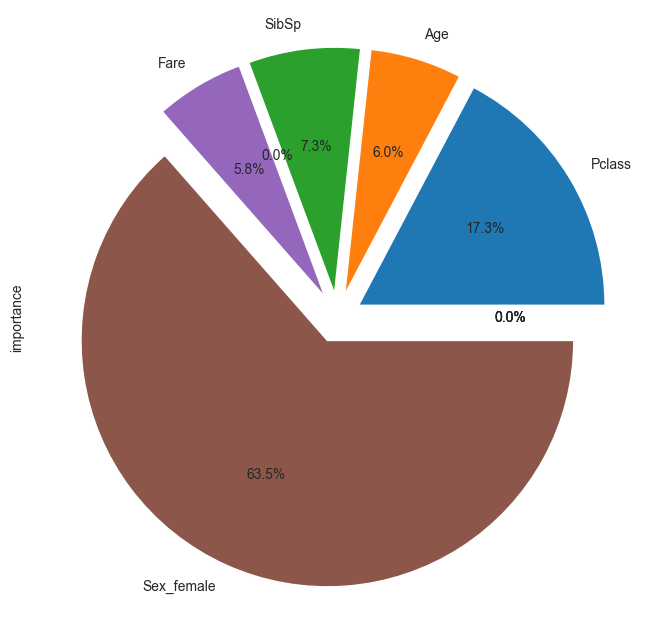

In [136]:
feature_importance_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importance_df.features,
                        y = 'importance',
                        autopct='%1.1f%%',
                        shadow=False,
                        legend=False,
                        figsize=(8, 8));

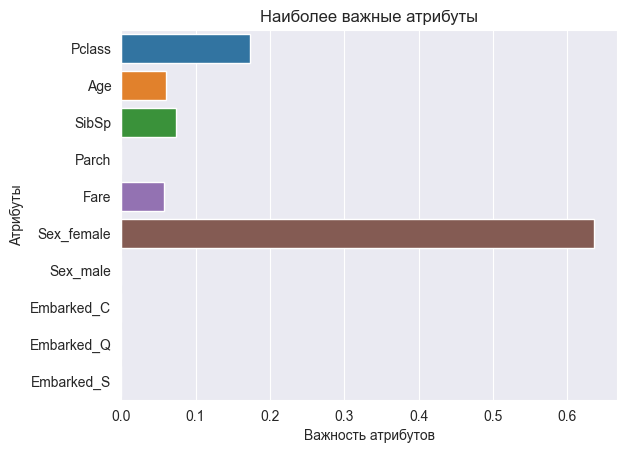

In [139]:
sns.barplot(y=feature_importance_df.features, x=feature_importance_df.importance)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

### Задача
Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

In [141]:
df = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [152]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [144]:
X = df.drop(['target'], axis=1)

In [145]:
y = df['target']

In [146]:
rs = np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = rs)

In [147]:
rf = RandomForestClassifier(10, max_depth=5)

In [151]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [153]:
fi = rf.feature_importances_

In [160]:
fi_pd = pd.DataFrame({'features': list(X_train), 'importance': fi})

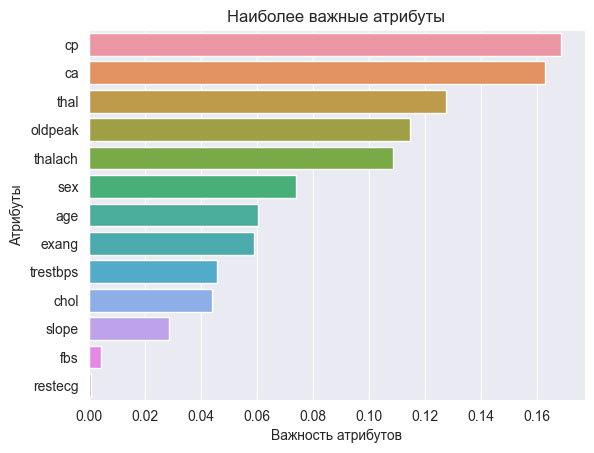

In [165]:
sns.barplot(y=fi_pd.features, x=fi_pd.importance, order=fi_pd.sort_values('importance', ascending=False).features)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

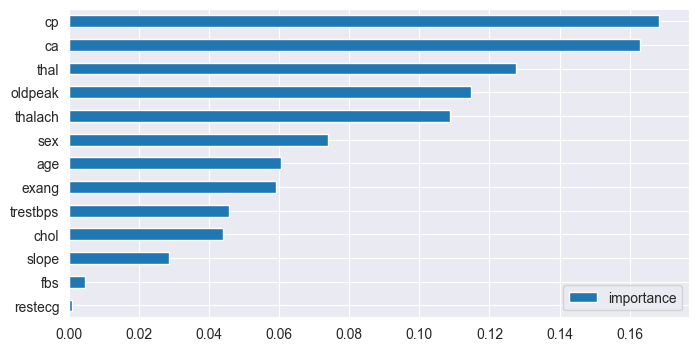

In [172]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(8, 4))
plt.show()

### Нейронные сети